-----------------------------------------------------------------------  ------
US Census Bureau, Department of Commerce                                 178510
National Oceanic and Atmospheric Administration, Department of Commerce  155713
U.S. Geological Survey, Department of the Interior                       109848
U.S. Department of Health & Human Services                                93297
Department of Agriculture                                                 76948
Department of Defense                                                     45886
Earth Data Analysis Center, University of New Mexico                      41974
Department of Education                                                   39064
Department of Transportation                                              37620
General Services Administration                                           31281
-----------------------------------------------------------------------  ------


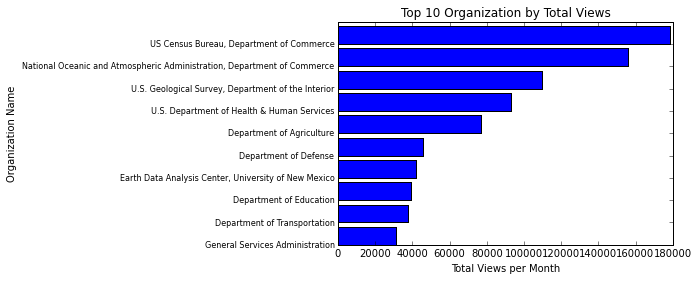

In [10]:
import csv
import operator
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

summ = []

# Open the file a read the lines. 
with open('datagovdatasetsviewmetrics.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
# Convert the views to integer
        row['Views per Month'] = int(row['Views per Month'])
# set the flag to initial
        flag = ' '
# Check whether the row is already in summarized table
        for item in summ:
            if item['Organization Name'] == row['Organization Name']:
# Add up the views to the summary table
                item['Views per Month'] = item['Views per Month'] + row['Views per Month']
                flag = 'X'
# No need to look further exit from loop to next record
                break
# No summary record found, add the new record to summary array
        if flag == ' ':
# Delete the columns which are not needed and append
            del row['Dataset Title']
            del row['package_id']
            del row['Date']
            summ.append(row)

# Sort the summary table descending by view count
summ = sorted(summ, key=operator.itemgetter('Views per Month'), reverse=True)

# Create an array with top 10 records and build X axis and Y axis tables
table = []
flag = 0
x = []
y = []
for item in summ:
    if flag < 10:
        table.append(item)
        x.append(item['Organization Name'])
        y.append(item['Views per Month'])
        flag += 1

# Print the pretty table
print tabulate(table)


# Display the table in a bar chart
chart = np.arange(len(y))[::-1]
plt.figure();
plt.barh(width=y,bottom=chart)
plt.yticks(chart,tuple(x),fontsize=8)
plt.xlabel('Total Views per Month')
plt.ylabel('Organization Name')
plt.title('Top 10 Organization by Total Views')
plt.show();